In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
from mlxtend.plotting import plot_decision_regions

In [5]:
data=pd.read_csv("Socialnetworkads.csv")
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


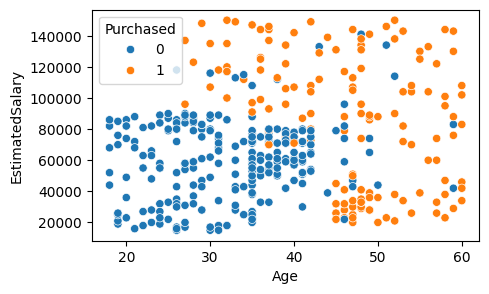

In [8]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="Age", y="EstimatedSalary", data=data, hue="Purchased")
plt.show()

In [10]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [14]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [16]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [18]:
X=data.iloc[:,:-1]
Y=data["Purchased"]

In [20]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [22]:
#Feature Scalling 
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [26]:
X

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(320, 2)

In [86]:
# We are using classifier because the data is not in linear format 
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
dt.score(X_test,Y_test)*100

83.75

In [40]:
#Our model is goint to overfitted because training accuracy is good but not test accuracy is low 
dt.score(X_train,Y_train)*100 

99.6875

In [42]:
dt.predict([[19,19000]])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
dt.predict([[35,20000]])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


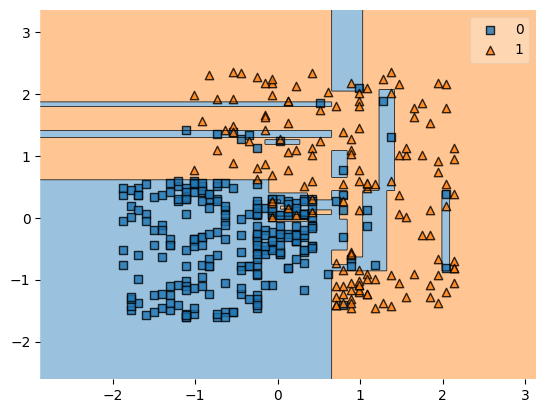

In [46]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [48]:
#Graph
from sklearn.tree import plot_tree

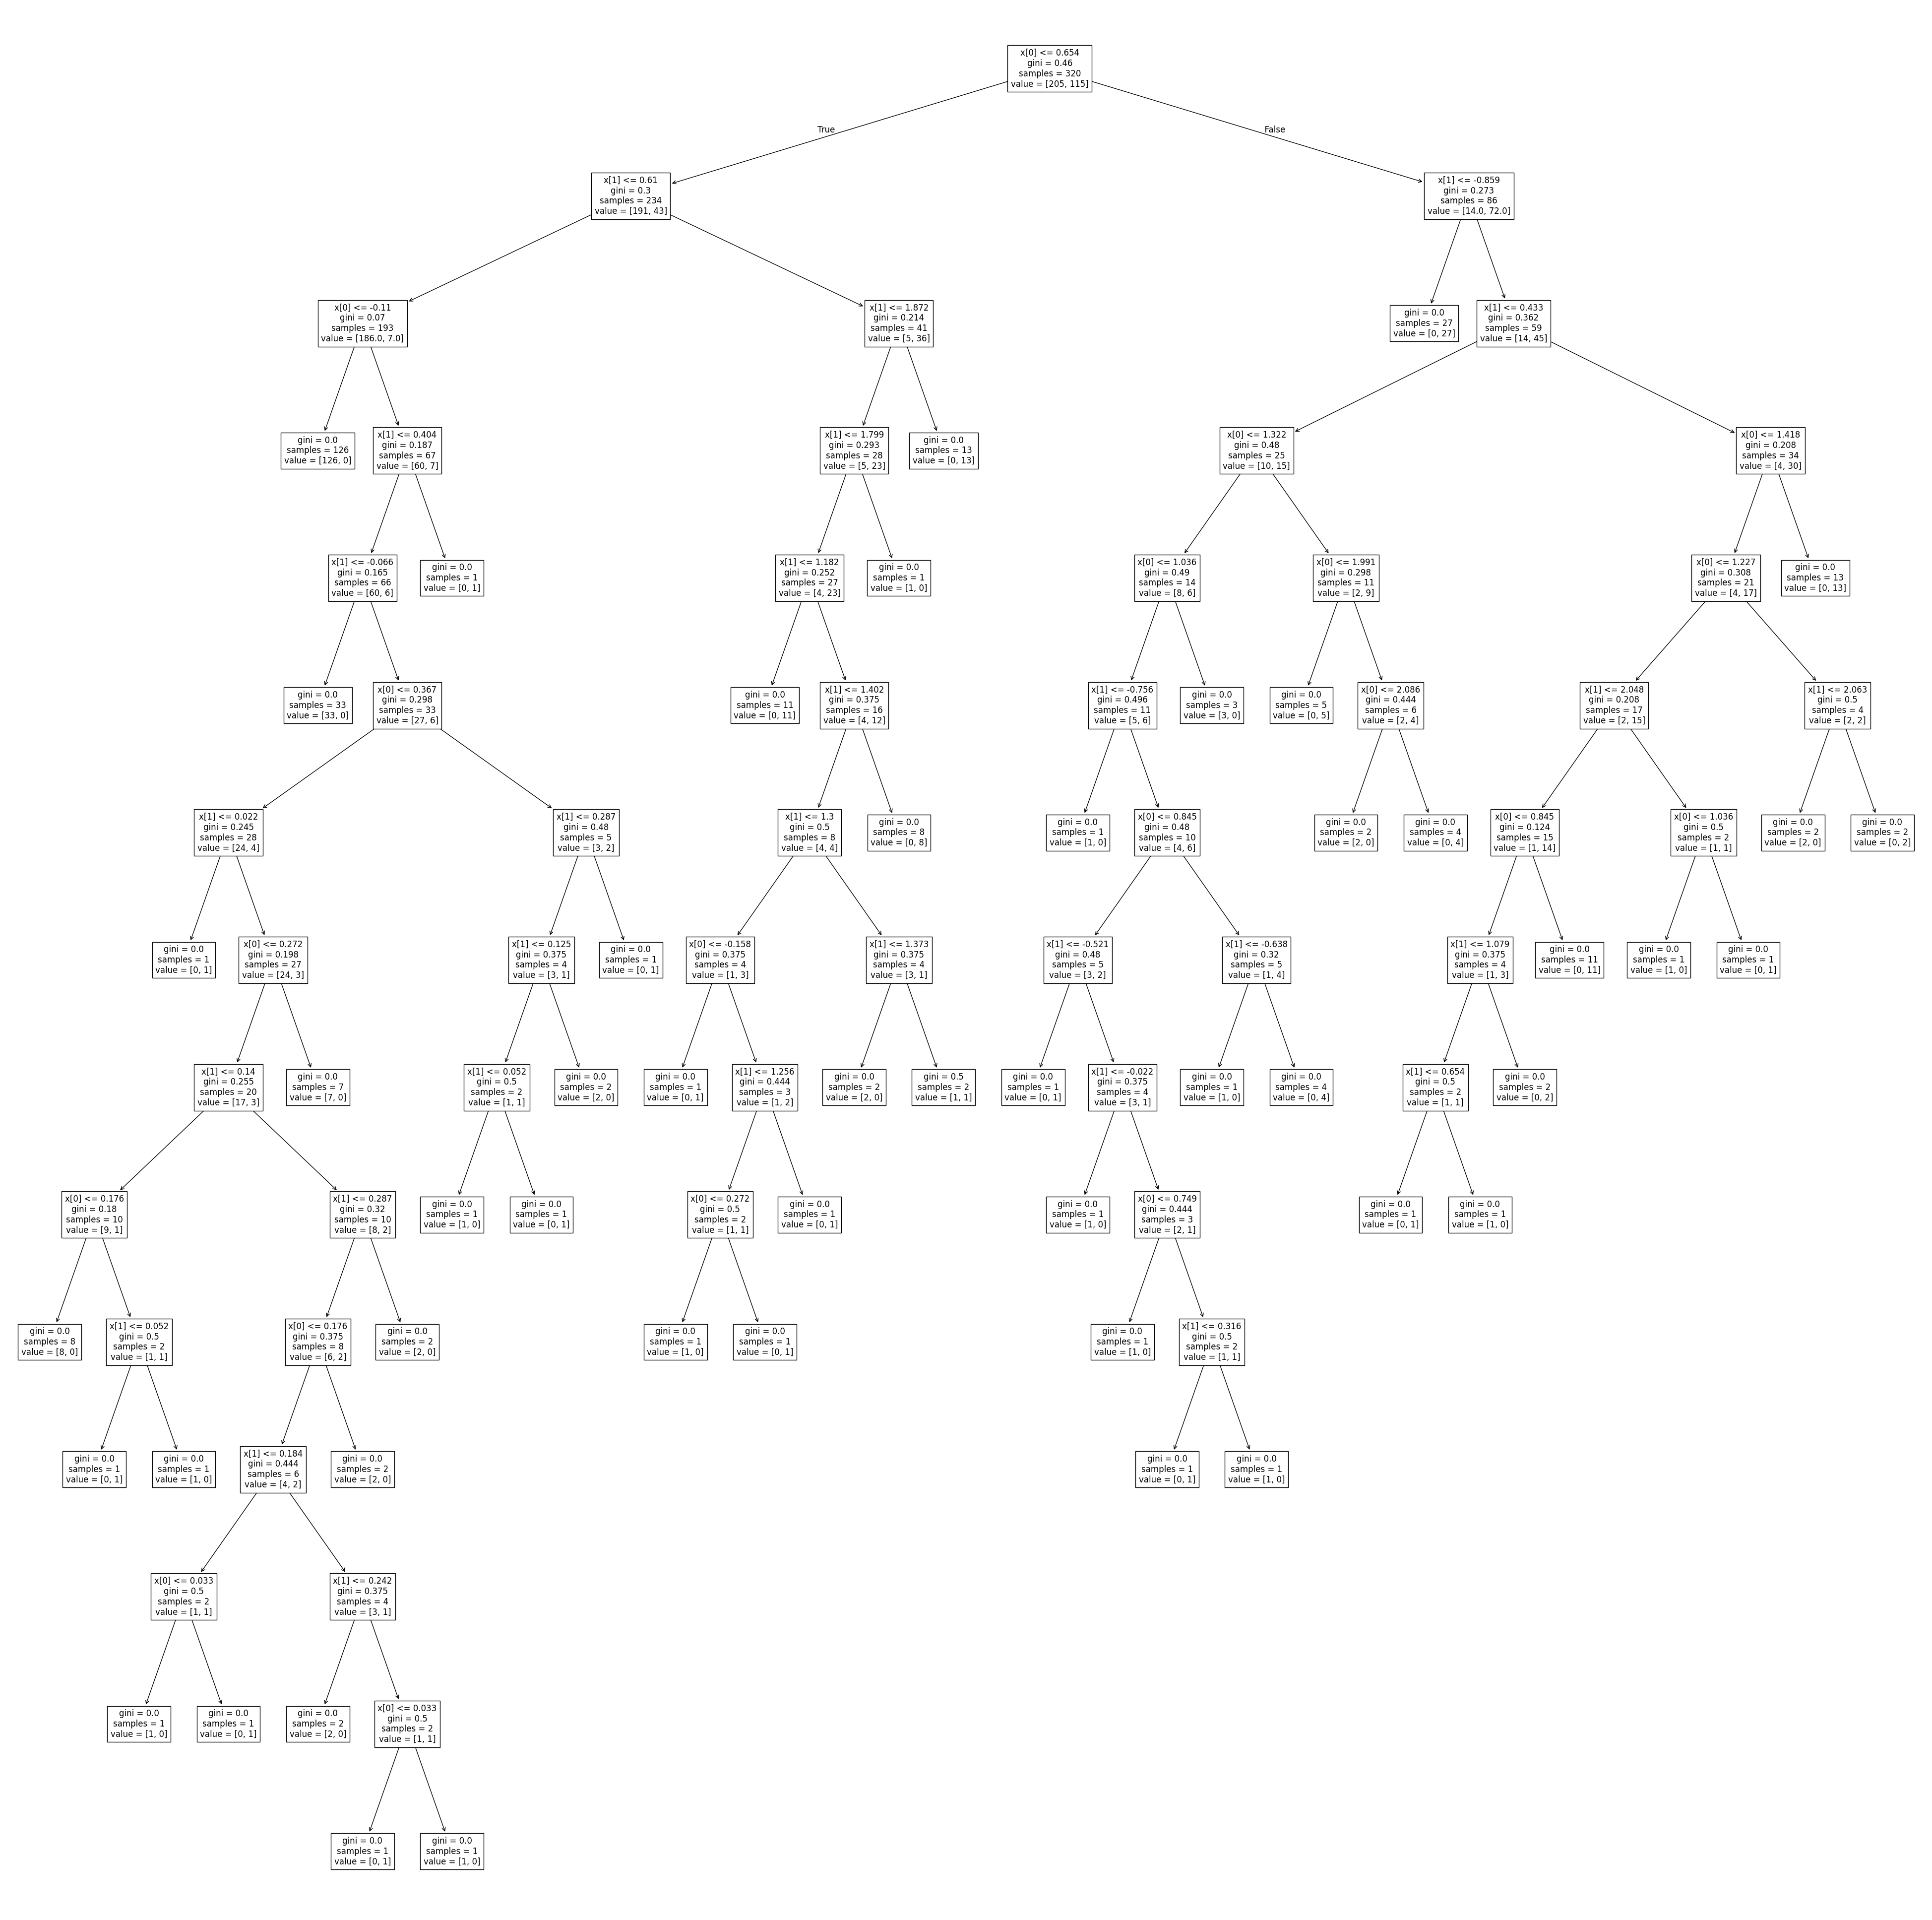

In [50]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("DT.jpg")
plt.show()

In [51]:
# check accuracy with ginni index
dt1= DecisionTreeClassifier(criterion='gini')
dt1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
dt1.score(X_test,Y_test)*100

83.75

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


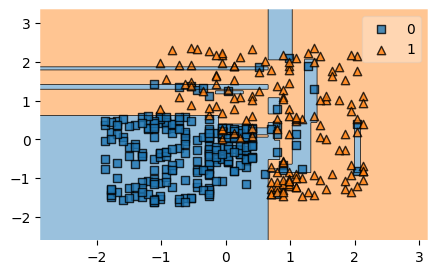

In [56]:
plt.figure(figsize=(5,3))
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [58]:
dt2= DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [60]:
dt2.score(X_test,Y_test)

0.8375

# Preuning

#two types of pre preuning and post preuning

In [63]:
dt_pre= DecisionTreeClassifier(max_depth=5)
dt_pre.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
dt_pre.score(X_test, Y_test)*100

90.0

In [67]:
dt_pre.score(X_train, Y_train)*100

93.4375

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


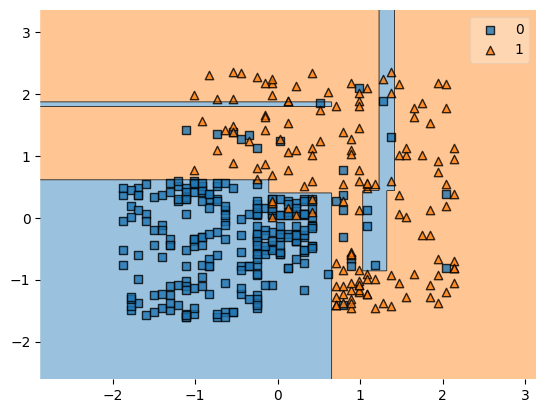

In [69]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt_pre)
plt.show()

# Post-preuning 

In [72]:
for i in range(1,20):
    dt_pre1= DecisionTreeClassifier(max_depth=i)
    dt_pre1.fit(X_train,Y_train)
    print(dt_pre1.score(X_train, Y_train), dt_pre1.score(X_test, Y_test),i)
# We choose that depth no which is difference is low 2 and 3

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.99375 0.8375 12
0.996875 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [74]:
dt_pre2= DecisionTreeClassifier(max_depth=3)
dt_pre2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
dt_pre2.score(X_test, Y_test)*100

91.25

In [78]:
dt_pre2.score(X_train, Y_train)*100

91.875

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


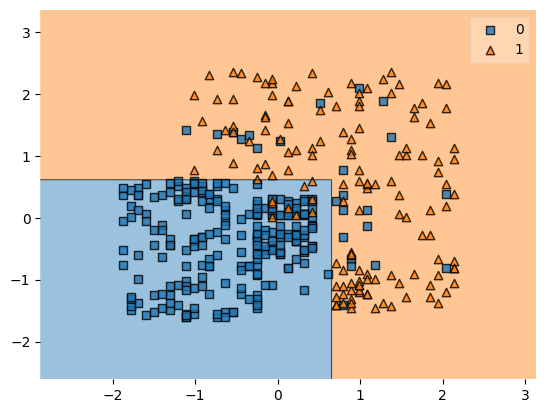

In [80]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt_pre2)
plt.show()

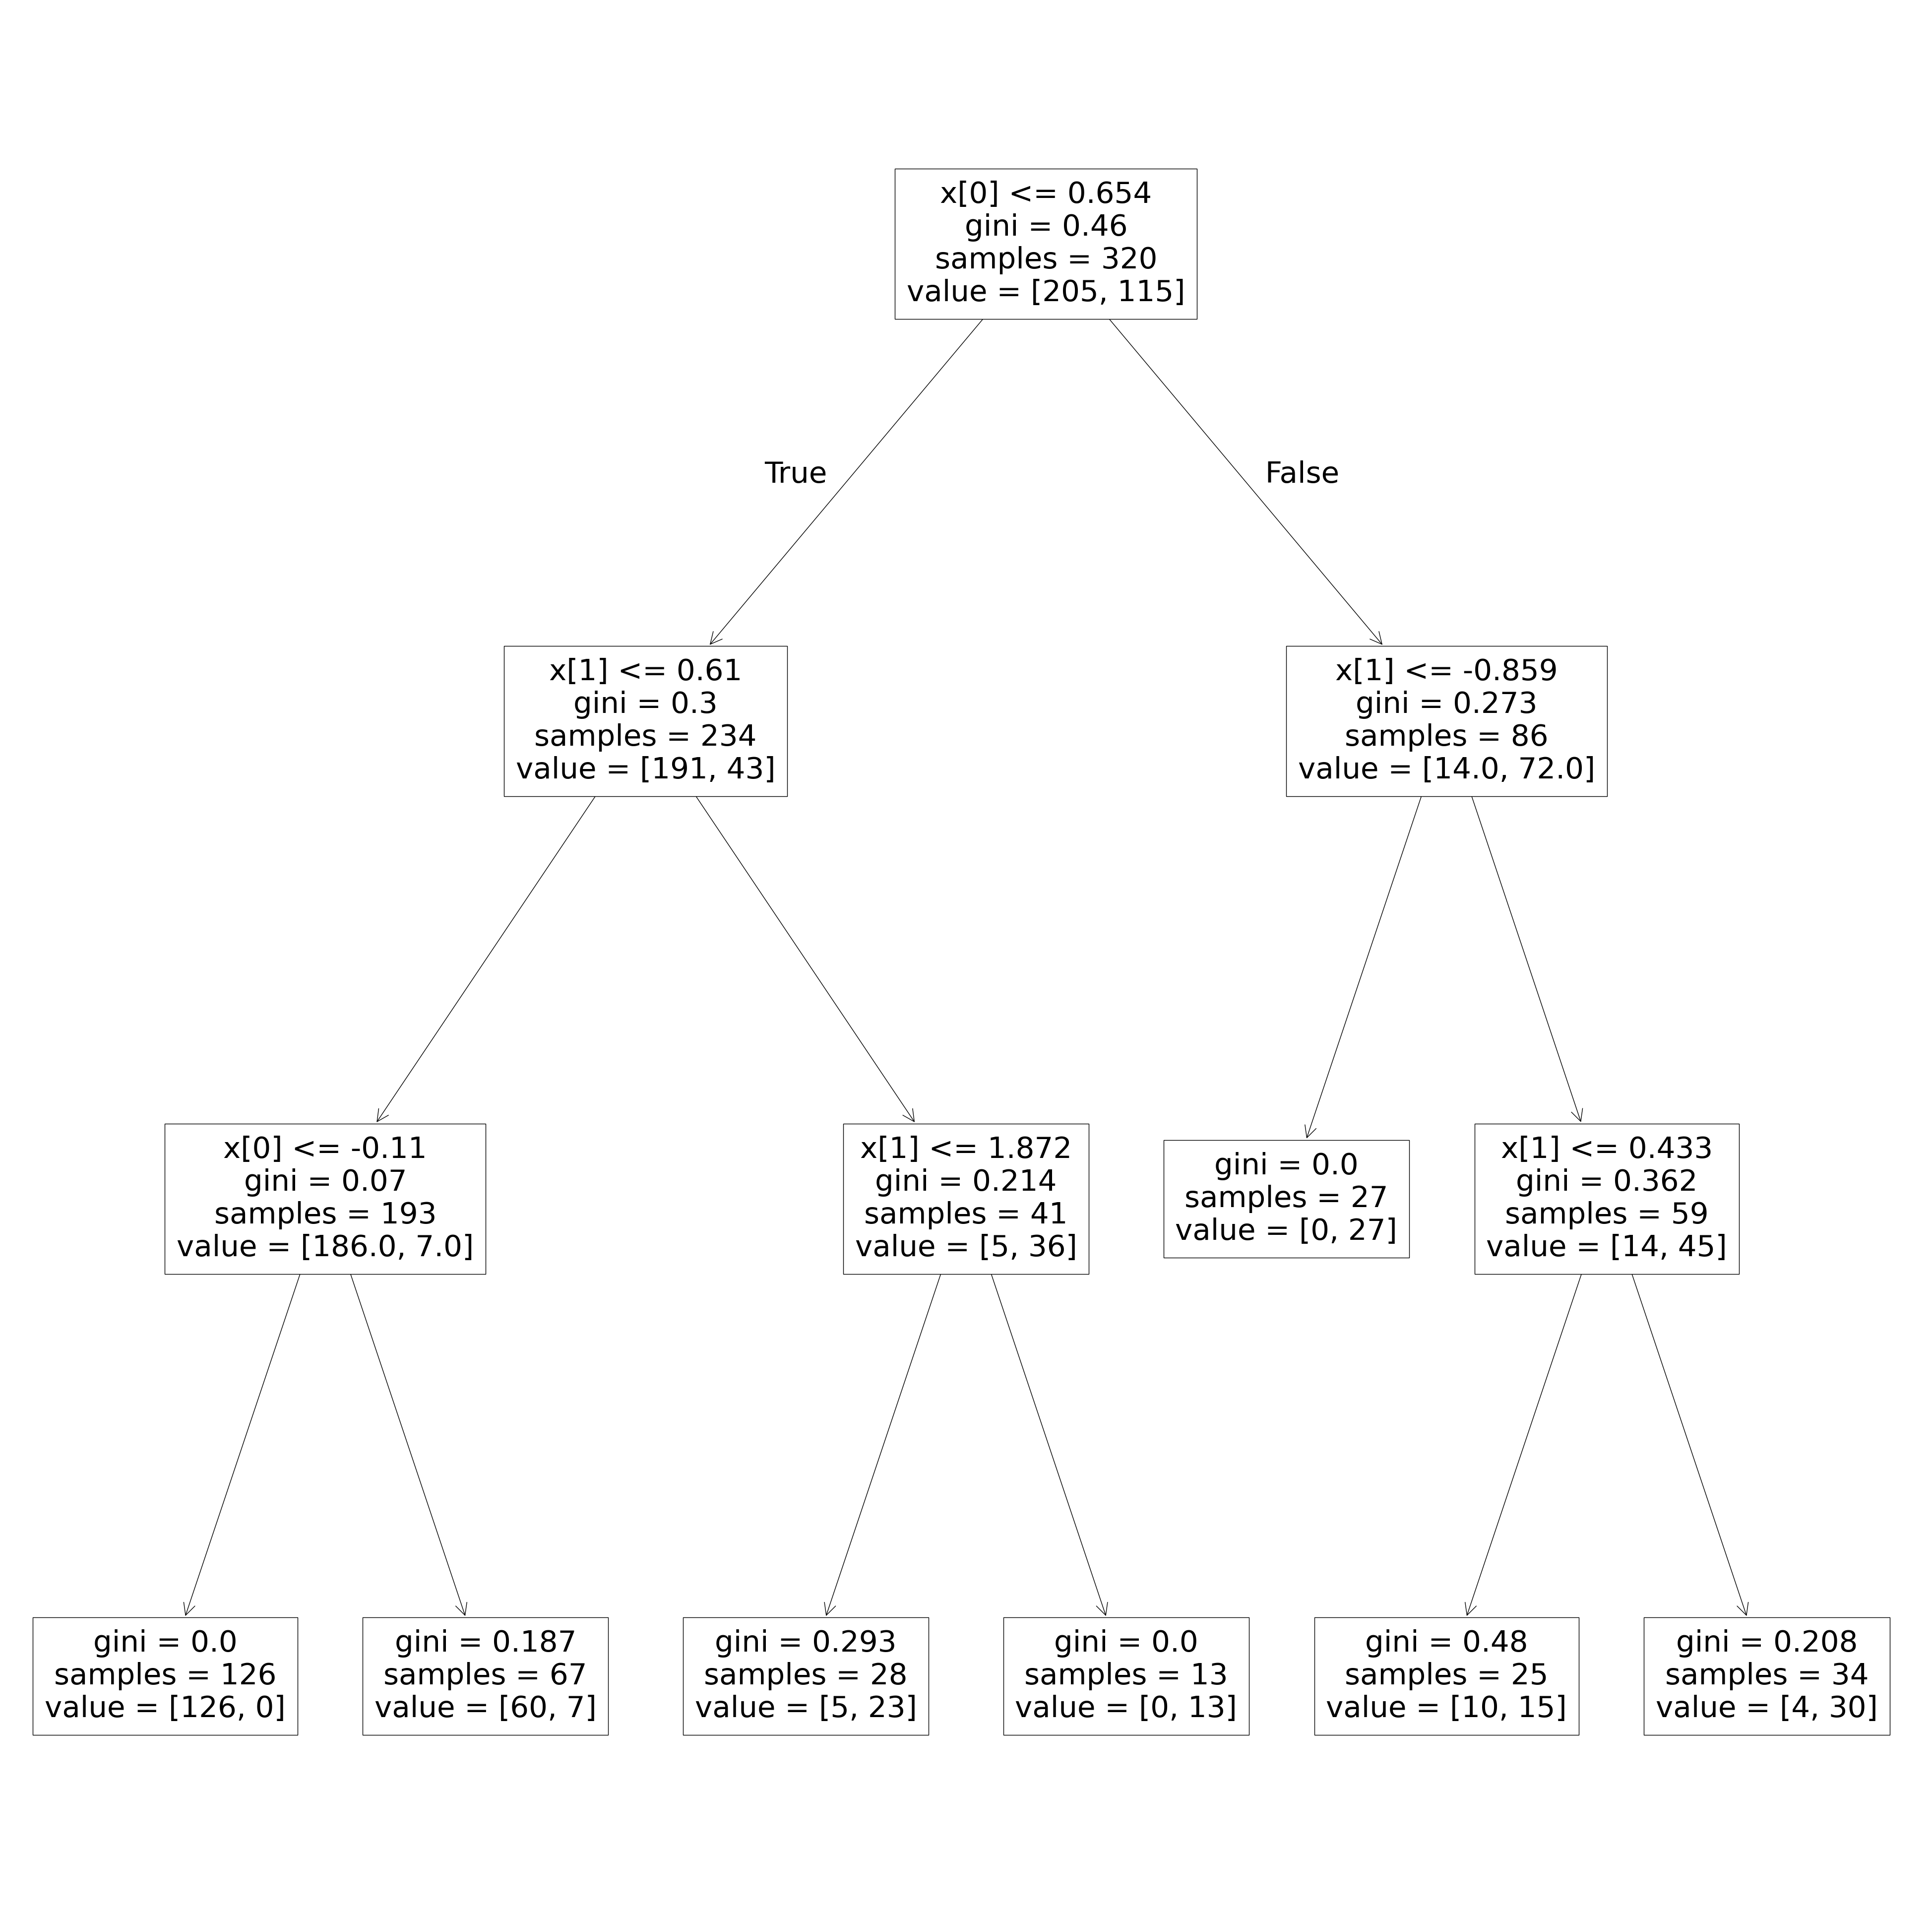

In [82]:
plt.figure(figsize=(50,50))
plot_tree(dt_pre2)
#plt.savefig("DT.jpg")
plt.show()